**Tâche 8 : Analyser la structure de bande du matériau NaHF2**

Pour cet exercice, nous allons d'abord importer les packages nécessaires, accéder aux données de l'API et afficher la structure de bande du matériau que nous allons analyser dans les questions 1, 2 et 3. Afin de ne pas confondre par la suite, nous allons utiliser le mot 'indice' si nous parlons de la bande d'indice 3 par exemple; si le mot 'indice' n'est pas spécifié, nous parlerons de la bande 3, qui est associée à l'indice 2, les indices commençant à 0. 

In [2]:
## Import 
import numpy as np
from pymatgen import Lattice, Structure, Molecule
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure import plotter
from pymatgen.analysis.diffraction.xrd import * 
from jupyter_jsmol.pymatgen import quick_view
from math import *
import pandas as pd
import tabulate
import matplotlib.pyplot as plt

In [3]:
## Accéder aux données liées au cristal NaHF2 via l'API
with MPRester("gTFWb3O68X2aDOkOAmv") as m:
    # Structure for material id
    bandstructure = m.get_bandstructure_by_material_id("mp-27837") 
    
# print(type(bandstructure))  # bandstructure = BandStructure

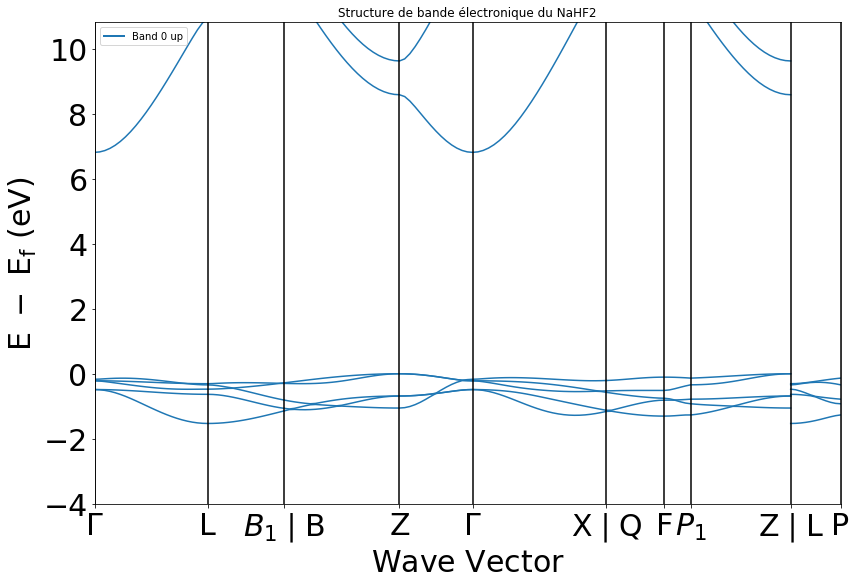

In [4]:
## Pour avoir un plot de la structure de bande, il faut créer un objet de la classe BSPlotter
bsplotter = BSPlotter(bandstructure)
bsplotter.get_plot()
plt.title("Structure de bande électronique du NaHF2")
plt.show()

**1) Déterminer la bande interdite**

In [5]:
## A partir de l'objet de la clases BandStructure
print(bandstructure.get_band_gap())

{'direct': False, 'energy': 6.8138000000000005, 'transition': 'Z-\\Gamma'}


La bande interdite, bande dans laquelle la densité d'état est nulle puisque ces états ne peuvent être occupés par aucun électron, est indirecte. Par définition, cela signifie que le maximum de la dernière bande de valence n'est pas aligné avec le minimum de la première bande de conduction. La transition n'est donc pas verticale. Par conséquent, pour qu'un électron passe de la bande de valence à la bande de conduction, il faut une interaction avec un photon et un phonon, pas simplement avec un photon comme pour une bande directe. 

La bande interdite a une énergie de 6.8138 eV, le cristal de NaHF2 est donc un isolant.
La transition se fait de Z à Γ.

**2) Trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion (insérer une figure indiquant la dispersion par des flèches)**

Nous allons d'abord trouver quelle est la dernière bande de valence et la première bande de conduction. 
Ensuite, sur chaque intervalle (au nombre de 9), pour la bande de valence et de conduction, nous allons calculer la pente de la bande et garder la pente maximale et minimale. 

In [6]:
## Trouver toutes les datas de la structure de bande
data = bsplotter.bs_plot_data() 
#print(data.keys())
#print(type(data))      # data = dico

ener = data.get('energy')['1']  

## Comprendre la liste ener : 
#print((type(ener)))    # ener = list
#print(len(ener))       # 9 intervalles en abscisses
#print(len(ener[1]))    # 96 bandes d'énergie pour chaque intervalle
#print(len(ener[5][95]))
# ce nombre change pour chaque intervalle ! c'est le nombre d'abscisse en x d'un intervalle
#print("Energie pour l'intervalle 4, la bande 10 et l'abscisse 0 :",ener[3][9][0]) 
# Bande 11 : indice [10] 

dist = data.get('distances') 

## Comprendre la liste dist : 
# premier indice de dist : l'intervalle - 1
# deuxième indice de dist : indice de l'abscisse dans l'intervalle
#print((type(dist)))    # dist = list
#print(len(dist))       # 9
#print(len(dist[5]))    # = len(ener[5][95]) mais ener != dist !!!
#print(dist[0][0])      # abscisse à l'indice 0.0 : pas dans les zones ! = distint[0]
#print(dist[1][0])      # abscisse à l'indice 0 sur la zone 2  = distint[1]

In [9]:
## Trouver la dernière bande de valence 
vbm = bandstructure.get_vbm()
print(vbm.get('band_index'))

## Trouver la première bande de conduction 
cbm = bandstructure.get_cbm()
print(cbm.get('band_index'))

defaultdict(<class 'list'>, {<Spin.up: 1>: [9, 10]})
defaultdict(<class 'list'>, {<Spin.up: 1>: [11]})


Le maximum de la bande de valence se trouve dans les bandes 10 et 11. 

Le minimum de la bande de conduction est contenu dans la bande 12.

La dernière bande de valence est donc la bande d'indice 10, donc la bande 11 et la première bande de conduction est la bande d'indice 11, donc la bande 12.

In [15]:
## Pour la bande de valence 11 indice 10

# Trouver le minimum de dispersion 
pentemin = abs(ener[0][10][-1]-ener[0][10][0] / (dist[0][-1]-dist[0][0]))
intmin = 0
for i in range (1,9): 
    if (abs((ener[i][10][-1]-ener[i][10][0])) / (dist[i][-1]-dist[i][0]) < pentemin ):
        pentemin = abs((ener[i][10][-1]-ener[i][10][0])) / (dist[i][-1]-dist[i][0])
        intmin = i 

# Trouver le maximum de dispersion 
pentemax = abs(ener[0][10][-1]-ener[0][10][0] / (dist[0][-1]-dist[0][0]))
intmax = 0
for j in range (1,9): 
    if (abs((ener[j][10][-1]-ener[j][10][0])) / (dist[j][-1]-dist[j][0]) > pentemax ):
        pentemax = abs((ener[j][10][-1]-ener[j][10][0])) / (dist[j][-1]-dist[j][0])
        intmax = j 
  

## Pour la bande de conduction 12 indice 11

# Trouver le minimum de dispersion
pentemin2 = abs(ener[0][11][-1]-ener[0][11][0] / (dist[0][-1]-dist[0][0]))
intmin2 = 0
for i in range (1,9): 
    if (abs((ener[i][11][-1]-ener[i][11][0])) / (dist[i][-1]-dist[i][0]) < pentemin2 ):
        pentemin2 = abs((ener[i][11][-1]-ener[i][11][0])) / (dist[i][-1]-dist[i][0])
        intmin2 = i 

# Trouver le maximum de dispersion
pentemax2 = abs(ener[0][10][-1]-ener[0][10][0] / (dist[0][-1]-dist[0][0]))
intmax2 = 0
for j in range (1,9): 
    if (abs((ener[j][11][-1]-ener[j][11][0])) / (dist[j][-1]-dist[j][0]) > pentemax2 ):
        pentemax2 = abs((ener[j][11][-1]-ener[j][11][0])) / (dist[j][-1]-dist[j][0])
        intmax2 = j 

bandes = [ "Dernière bande de valence", "Première bande de conduction"]
num = [11, 12]
energie = [ener[3][10][0], ener[4][11][0]]
mindisp = [pentemin, pentemin2]
intermin = [intmin+1, intmin2+1]
transitionmin = ["$\Gamma-X|Q$", "$F-P_1$"]
maxdisp = [pentemax, pentemax2]
intermax = [intmax+1, intmax2+1]
transitionmax = ["$Z|L-P$", "$\Gamma-X|Q$"]
df = pd.DataFrame({'Bande': bandes,
                    'Numéro de la bande': num,
                    'Energie au sommet/creux de la bande': energie,
                    'Minimum de dispersion' : mindisp,
                    'Intervalle du minimum de dispersion': intermin,
                    'Transition (pour le min)' : transitionmin,
                    'Maximum de dispersion': maxdisp,
                    'Intervalle du maximum de dispersion': intermax,
                    'Transition (pour le max)': transitionmax
                   })
df.head() 

,Bande,Numéro de la bande,Energie au sommet/creux de la bande,Minimum de dispersion,Intervalle du minimum de dispersion,Transition (pour le min),Maximum de dispersion,Intervalle du maximum de dispersion,Transition (pour le max)
0,Dernière bande de valence,11,0.0000,0.030321,5,$\Gamma-X|Q$,0.370441,9,$Z|L-P$
1,Première bande de conduction,12,6.8138,0.893471,7,$F-P_1$,4.422347,5,$\Gamma-X|Q$


Text(0.5, 1.0, 'Structure de bande électronique du NaHF2')

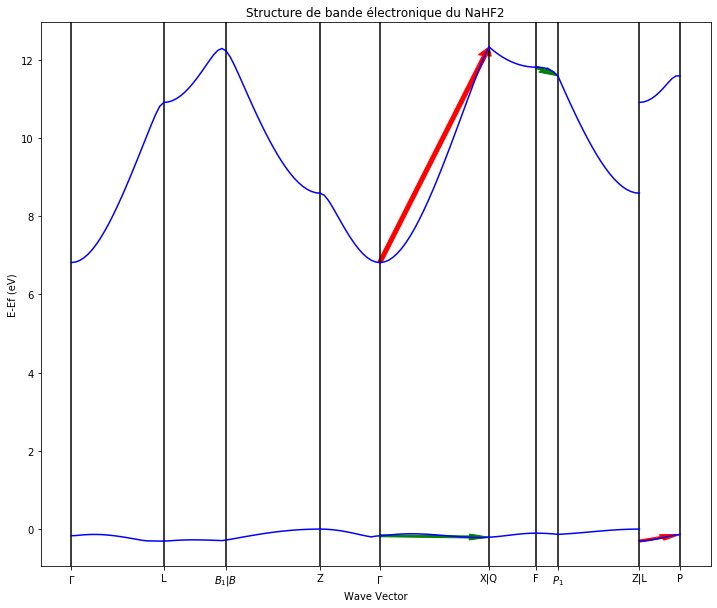

In [16]:
## Plotter avec les flèches : 
figure,ax = plt.subplots(1,1,figsize=(12,10))

for i in range(len(dist)):
    plt.axvline(dist[i][0],0,color="black")     # add vertical line across the axes
plt.axvline(dist[len(dist)-1][-1], 0, color="black")

ax.set_xticks([dist[0][0], dist[1][0], dist[2][0], dist[3][0], dist[4][0], dist[5][0], dist[6][0], dist[7][0], dist[8][0], dist[8][-1] ])
ax.set_xticklabels(['$\Gamma$','L','$B_1|B$','Z','$\Gamma$','X|Q','F','$P_1$','Z|L','P'])
ax.set_xlabel('Wave Vector')
ax.set_ylabel('E-Ef (eV)')

for i in range(len(dist)): 
    plt.plot(dist[i],ener[i][10],'b')
    plt.plot(dist[i],ener[i][11],'b')
    
#fleche minimum de dispersion bande de valence indice 10
arrX = dist[intmin][-1] - dist[intmin][0]
arrY = ener[intmin][10][-1] - ener[intmin][10][0]
plt.arrow(dist[intmin][0],ener[intmin][10][0],arrX, arrY,color='g',width=0.05,length_includes_head=True)

#fleche maximum de dispersion bande de valence indice 10
arrX = dist[intmax][-1] - dist[intmax][0]
arrY = ener[intmax][10][-1] - ener[intmax][10][0]
plt.arrow(dist[intmax][0],ener[intmax][10][0],arrX, arrY,color='r',width=0.05,length_includes_head=True)

#fleche minimum de dispersion bande de conduction indice 11
arrX = dist[intmin2][-1] - dist[intmin2][0]
arrY = ener[intmin2][11][-1] - ener[intmin2][11][0]
plt.arrow(dist[intmin2][0],ener[intmin2][11][0],arrX, arrY,color='g',width=0.05,length_includes_head=True)

#fleche maximum de dispersion bande de conduction indice 11
arrX = dist[intmax2][-1] - dist[intmax2][0]
arrY = ener[intmax2][11][-1] - ener[intmax2][11][0]
plt.arrow(dist[intmax2][0],ener[intmax2][11][0],arrX, arrY,color='r',width=0.05,length_includes_head=True)
plt.title('Structure de bande électronique du NaHF2')

Sur ce graphique, nous pouvons voir la première bande conduction ainsi que la dernière bande de valence. Les maximums de dispersion sont représentés par les flèches rouges et les minimums de dispersion par les flèches vertes. 

**3) Calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique**

La masse effective $m^*$ est donnée par la formule suivante : 
$$m^* = \frac{\hbar^2} {(\partial ^2 \epsilon / \partial k^2)}$$

,Bande,Numéro de la bande,Coefficients abc de la parabole d'équation ax² + bx + c,Masse effective
0,Dernière bande de valence,11,"[-0.4861836619610398, 2.670268349953039, -3.66...",-7.138576e-30
1,Première bande de conduction,12,"[5.311568955874137, -37.37145812389242, 72.548...",6.534150e-31


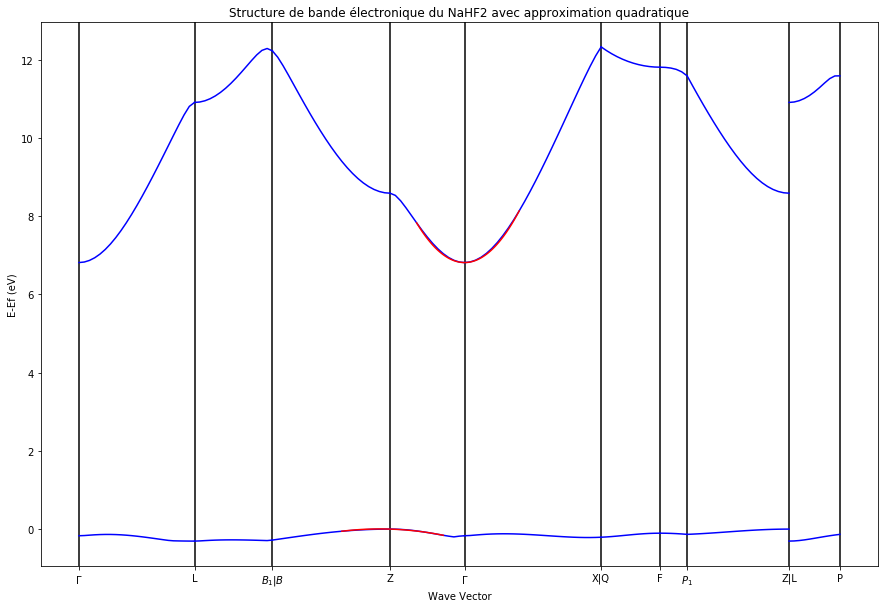

In [17]:
## Conversion d'unité
Ang = 10**-10 
eV = 1.602176563*10**(-19) 
hbar = 1.054571818*10**(-34)

figure,ax = plt.subplots(1,1,figsize=(15,10))

for i in range(len(dist)):
    plt.axvline(dist[i][0],0,color="black")     
plt.axvline(dist[len(dist)-1][-1], 0, color="black")

ax.set_xticks([dist[0][0], dist[1][0], dist[2][0], dist[3][0], dist[4][0], dist[5][0], dist[6][0], dist[7][0], dist[8][0], dist[8][-1] ])
ax.set_xticklabels(['$\Gamma$','L','$B_1|B$','Z','$\Gamma$','X|Q','F','$P_1$','Z|L','P'])
ax.set_xlabel('Wave Vector')
ax.set_ylabel('E-Ef (eV)')


## Pour la bande de valence indice 10
for i in range(len(dist)):
    plt.plot(dist[i],ener[i][10],'b')

x_val = [dist[2][-10], dist[3][0],dist[3][10]]
y_val = [ener[2][10][-10], ener[3][10][0], ener[3][10][10]]

para_val = np.polyfit(x_val,y_val,2)
linspace_val = np.linspace(dist[2][-10],dist[3][10],100) 
plt.plot(linspace_val, np.polyval(para_val,linspace_val), 'red')

# système de 3 équations à 3 inconnues pour les coefficients a, b et c de la parabole
A = [[x_val[0]**2, x_val[0], 1], [x_val[1]**2, x_val[1], 1], [x_val[2]**2, x_val[2], 1]]
B = np.transpose(y_val)
abc = np.linalg.solve(A,B)

masse = (hbar**2)/(2*abc[0]*Ang**2*eV)


## Pour la bande de conduction indice 11
for i in range(len(dist)):
    plt.plot(dist[i],ener[i][11],'b')

x_cond = [dist[3][-10], dist[4][0],dist[4][10]]
y_cond = [ener[3][11][-10], ener[4][11][0], ener[4][11][10]]

para_cond = np.polyfit(x_cond,y_cond,2)
linspace_cond = np.linspace(dist[3][-10],dist[4][10],100) 
plt.plot(linspace_cond, np.polyval(para_cond,linspace_cond), 'red')

#s ystème de 3 équations à 3 inconnues pour les coefficients a, b et c de la parabole
A = [[x_cond[0]**2, x_cond[0], 1], [x_cond[1]**2, x_cond[1], 1], [x_cond[2]**2, x_cond[2], 1]]
B = np.transpose(y_cond)
abc2 = np.linalg.solve(A,B)

masse2 = (hbar**2)/(2*abc2[0]*Ang**2*eV)
plt.title('Structure de bande électronique du NaHF2 avec approximation quadratique')

coeff = [abc, abc2]
masse_eff = [masse, masse2]
df = pd.DataFrame({'Bande': bandes,
                    'Numéro de la bande': num,
                    'Coefficients abc de la parabole d\'équation ax² + bx + c' : coeff,
                    'Masse effective': masse_eff
                   })
df.head() 

Sur ce graphique, nous pouvons voir la première bande conduction ainsi que la dernière bande de valence. Les approximations quadratiques sont représentées en rouge. 